# Solar Image Classification for Storm Prediction


In [1]:
# Ensure to be in Tensorflow enviroment
conda env list

# conda environments:
#
                         C:\Users\seun\AppData\Local\R-MINI~1
                         C:\Users\seun\AppData\Local\R-MINI~1\envs\r-reticulate

Note: you may need to restart the kernel to use updated packages.base                  *  C:\Users\seun\anaconda3




#### Load packages

In [2]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import scipy
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# deep learning stack
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization

In [3]:
# tensorflow and keras version
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')

TensorFlow version: 2.9.1
Keras version: 2.9.0


**Load model**

In [4]:
# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

**User-defined functions**

In [5]:
def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

In [6]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
 
def image_preprocessing(resized_image):
    """
    This function preprocesses the input image for MobileNetV2
    """
    pic_array = image.img_to_array(resized_image)
    image_batch = np.expand_dims(pic_array, axis=0)
    processed_image = preprocess_input(image_batch)
    return processed_image

In [7]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

def image_class_prediction(model, preprocessed_image):
    """
    This function spits out the top-5 predictions 
    for a given model with a proprocessed image
    """
    model_prediction = model.predict(preprocessed_image,verbose=0)
    decoded_prediction = decode_predictions(model_prediction,top=5)[0]
    data = {'image_class': [_[1] for _ in decoded_prediction],
            'probability': [_[2] for _ in decoded_prediction]
           }
    df = pd.DataFrame(data=data)
    return df

**Instantiate model**

In [8]:
pretrained_model = MobileNetV2(weights='imagenet')

**Model summary**

In [9]:
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

**Model evaluation**

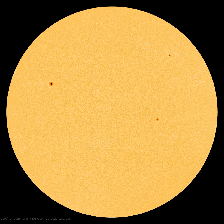

In [10]:
# resize and show image
resized_image = image_resizing('test/b1.jpg')
resized_image

In [11]:
# preprocess an image
preprocessed_img = image_preprocessing(resized_image)

# class prediction
image_class_prediction(pretrained_model, preprocessed_img)

,image_class,probability
0,face_powder,0.743292
1,tennis_ball,0.035443
2,ping-pong_ball,0.019310
3,pick,0.010444
4,soup_bowl,0.006879


##################################################################################################

## Testing solar image classes

**Getting new training images into keras**

In [12]:
# this are the folder names
classes = os.listdir('train')
classes

['B_class', 'C_class', 'M_class']

In [13]:
# define an image data generator
data_gen = keras.preprocessing.image.ImageDataGenerator(
    # define the preprocessing function to be applied to all images
    preprocessing_function=preprocess_input
)

In [14]:
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(
        directory='./train',
        class_mode="categorical",
        classes=classes,
        batch_size=500,
        target_size=(224, 224)
)

Found 390 images belonging to 3 classes.


In [15]:
# load in all images at once
xtrain, ytrain = next(train_data_gen)
xtrain.shape, ytrain.shape

((390, 224, 224, 3), (390, 3))

### Model Building 

** Select the convolutional base and freeze the weights**

In [16]:
base_model = MobileNetV2(
    weights='imagenet', 
    alpha=1.0,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

# freeze it!
base_model.trainable = False




In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

** Add dense layers on top**

In [18]:
def model_builder(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model = keras.Sequential()
    model.add(base_model)
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-160
    hp_units = hp.Int('units', min_value=32, max_value=160, step=32)
    
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    
    #normalize
    model.add(BatchNormalization(renorm=True))
    model.add(keras.layers.Dense(units=100, activation='relu'))  
    model.add(keras.layers.Dropout(0.5))
    
      
    
    model.add(BatchNormalization(renorm=True))
    model.add(keras.layers.Dense(units=100, activation='relu'))  
    model.add(keras.layers.Dropout(0.5))
    
    model.add(BatchNormalization(renorm=True))
    model.add(keras.layers.Dense(units=100, activation='relu'))  
    model.add(keras.layers.Dropout(0.5))
      
    
    # Add next layers
    
    model.add(keras.layers.Dense(units=32, activation='relu')) 
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(len(classes), activation='softmax'))
    
    #Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
             loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.categorical_accuracy])

    return model

### Hyperparameter Tuning

In [19]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_categorical_accuracy', # objective to optimize
                     max_epochs=1000,
                     hyperband_iterations=3,
                     project_name='tuning_results')

INFO:tensorflow:Reloading Oracle from existing project ./tuning_results/oracle.json
INFO:tensorflow:Reloading Tuner from ./tuning_results/tuner0.json


In [20]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 160, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [21]:
# Perform hypertuning
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

tf.autograph.experimental.do_not_convert
tuner.search(xtrain, ytrain,
             epochs=800,
             batch_size=32,
             #callbacks=[stop_early],
             validation_split=1/5)

INFO:tensorflow:Oracle triggered exit


In [22]:
# best hyperparameters
best_hp=tuner.get_best_hyperparameters(1)[0]

In [23]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_6 (Dense)             (None, 160)               204960    
                                                                 
 dropout_5 (Dropout)         (None, 160)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 160)              1120      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 100)               16100     
                                                                 
 dropout_6 (Dropout)         (None, 100)              

###  Model Training

In [24]:
tf.autograph.experimental.do_not_convert
h_model.fit(xtrain, ytrain,
            epochs=800,
            batch_size=32,
            #callbacks=[stop_early],
            validation_split=1/5)

Epoch 1/400
10/10 [==============================] - 18s 1s/step - loss: 1.8120 - categorical_accuracy: 0.3526 - val_loss: 1.1239 - val_categorical_accuracy: 0.2949
Epoch 2/400
10/10 [==============================] - 12s 1s/step - loss: 1.6217 - categorical_accuracy: 0.3590 - val_loss: 1.1053 - val_categorical_accuracy: 0.2564
Epoch 3/400
10/10 [==============================] - 12s 1s/step - loss: 1.5588 - categorical_accuracy: 0.3462 - val_loss: 1.0977 - val_categorical_accuracy: 0.2821
Epoch 4/400
10/10 [==============================] - 12s 1s/step - loss: 1.5258 - categorical_accuracy: 0.3365 - val_loss: 1.0958 - val_categorical_accuracy: 0.3462
Epoch 5/400
10/10 [==============================] - 12s 1s/step - loss: 1.4189 - categorical_accuracy: 0.3526 - val_loss: 1.1024 - val_categorical_accuracy: 0.2821
Epoch 6/400
10/10 [==============================] - 12s 1s/step - loss: 1.3675 - categorical_accuracy: 0.4071 - val_loss: 1.1092 - val_categorical_accuracy: 0.2821
Epoch 7/40

10/10 [==============================] - 13s 1s/step - loss: 1.0650 - categorical_accuracy: 0.4295 - val_loss: 0.9991 - val_categorical_accuracy: 0.5769
Epoch 100/400
10/10 [==============================] - 12s 1s/step - loss: 1.1396 - categorical_accuracy: 0.4103 - val_loss: 1.0009 - val_categorical_accuracy: 0.5385
Epoch 101/400
10/10 [==============================] - 12s 1s/step - loss: 1.0810 - categorical_accuracy: 0.4551 - val_loss: 1.0041 - val_categorical_accuracy: 0.5000
Epoch 102/400
10/10 [==============================] - 12s 1s/step - loss: 1.0916 - categorical_accuracy: 0.4071 - val_loss: 1.0036 - val_categorical_accuracy: 0.5513
Epoch 103/400
10/10 [==============================] - 13s 1s/step - loss: 1.1208 - categorical_accuracy: 0.3814 - val_loss: 0.9975 - val_categorical_accuracy: 0.6154
Epoch 104/400
10/10 [==============================] - 13s 1s/step - loss: 1.1042 - categorical_accuracy: 0.4135 - val_loss: 0.9982 - val_categorical_accuracy: 0.5641
Epoch 105/40

10/10 [==============================] - 13s 1s/step - loss: 1.0396 - categorical_accuracy: 0.4936 - val_loss: 0.9039 - val_categorical_accuracy: 0.6538
Epoch 198/400
10/10 [==============================] - 12s 1s/step - loss: 0.9850 - categorical_accuracy: 0.5000 - val_loss: 0.9113 - val_categorical_accuracy: 0.6923
Epoch 199/400
10/10 [==============================] - 12s 1s/step - loss: 1.0586 - categorical_accuracy: 0.4551 - val_loss: 0.9142 - val_categorical_accuracy: 0.6410
Epoch 200/400
10/10 [==============================] - 13s 1s/step - loss: 0.9663 - categorical_accuracy: 0.5192 - val_loss: 0.9200 - val_categorical_accuracy: 0.6026
Epoch 201/400
10/10 [==============================] - 13s 1s/step - loss: 0.9934 - categorical_accuracy: 0.5000 - val_loss: 0.9237 - val_categorical_accuracy: 0.6282
Epoch 202/400
10/10 [==============================] - 12s 1s/step - loss: 0.9862 - categorical_accuracy: 0.4936 - val_loss: 0.9291 - val_categorical_accuracy: 0.6154
Epoch 203/40

10/10 [==============================] - 13s 1s/step - loss: 0.7774 - categorical_accuracy: 0.6667 - val_loss: 0.7428 - val_categorical_accuracy: 0.7692
Epoch 296/400
10/10 [==============================] - 12s 1s/step - loss: 0.7667 - categorical_accuracy: 0.6154 - val_loss: 0.7263 - val_categorical_accuracy: 0.7949
Epoch 297/400
10/10 [==============================] - 13s 1s/step - loss: 0.8030 - categorical_accuracy: 0.6282 - val_loss: 0.7657 - val_categorical_accuracy: 0.7564
Epoch 298/400
10/10 [==============================] - 14s 1s/step - loss: 0.7994 - categorical_accuracy: 0.6122 - val_loss: 0.7717 - val_categorical_accuracy: 0.7821
Epoch 299/400
10/10 [==============================] - 13s 1s/step - loss: 0.8060 - categorical_accuracy: 0.6571 - val_loss: 0.7690 - val_categorical_accuracy: 0.7692
Epoch 300/400
10/10 [==============================] - 13s 1s/step - loss: 0.7487 - categorical_accuracy: 0.6250 - val_loss: 0.7544 - val_categorical_accuracy: 0.7949
Epoch 301/40

10/10 [==============================] - 12s 1s/step - loss: 0.5827 - categorical_accuracy: 0.7436 - val_loss: 0.5499 - val_categorical_accuracy: 0.7821
Epoch 394/400
10/10 [==============================] - 12s 1s/step - loss: 0.5304 - categorical_accuracy: 0.8141 - val_loss: 0.5903 - val_categorical_accuracy: 0.7692
Epoch 395/400
10/10 [==============================] - 12s 1s/step - loss: 0.5284 - categorical_accuracy: 0.7949 - val_loss: 0.5939 - val_categorical_accuracy: 0.7692
Epoch 396/400
10/10 [==============================] - 12s 1s/step - loss: 0.5335 - categorical_accuracy: 0.7981 - val_loss: 0.5762 - val_categorical_accuracy: 0.7949
Epoch 397/400
10/10 [==============================] - 12s 1s/step - loss: 0.5315 - categorical_accuracy: 0.7821 - val_loss: 0.5455 - val_categorical_accuracy: 0.7949
Epoch 398/400
10/10 [==============================] - 12s 1s/step - loss: 0.5130 - categorical_accuracy: 0.7949 - val_loss: 0.5536 - val_categorical_accuracy: 0.7692
Epoch 399/40

In [36]:
#from keras.models import load_model

#h_model.save('my_model2.h5')

In [35]:
#import joblib

#joblib.dump(h_model, 'my_model1.pkl')

INFO:tensorflow:Assets written to: ram://4173d83f-045d-4807-b680-a7d357d85057/assets


INFO:tensorflow:Assets written to: ram://4173d83f-045d-4807-b680-a7d357d85057/assets


['my_model1.pkl']

In [ ]:
#from keras.models import load_model

#h_model.save('MobileNetV2_solar_pred83_NEW.h5')

In [26]:
#import pickle 

#with open ("MobileNetV2_solar_pred_73.bin", "wb") as file_out:
    #pickle.dump(MobileNetV2_solar_pred_73,file_out

In [27]:
losses = pd.DataFrame(h_model.history.history) # losses in the training history
losses.head()


,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,1.812013,0.352564,1.123934,0.294872
1,1.621682,0.358974,1.105270,0.256410
2,1.558817,0.346154,1.097722,0.282051
3,1.525781,0.336538,1.095804,0.346154
4,1.418922,0.352564,1.102447,0.282051


In [28]:
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

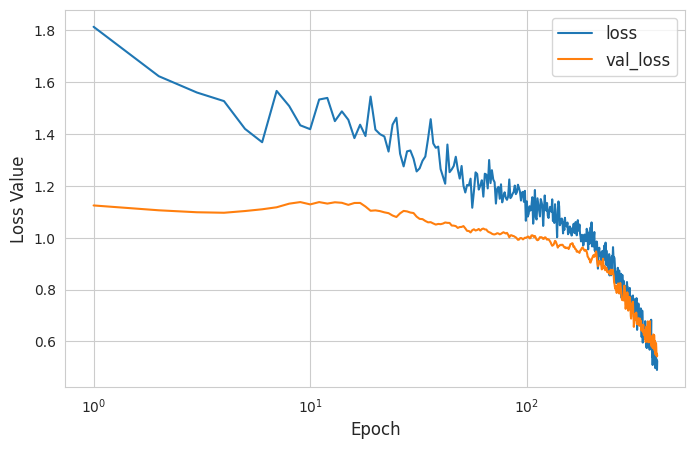

In [29]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)
None

###  Model Evaluation

In [30]:
#from tensorflow import keras
#model1 = keras.models.load_model('MobileNetV2_solar_pred1.h5')


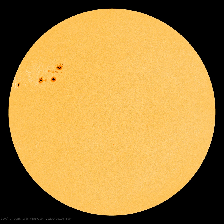

In [31]:
# resize and show image
resized_image = image_resizing('test/cb.jpg')
resized_image

In [32]:
# preprocess an image
preprocessed_img = image_preprocessing(resized_image)

In [33]:
def image_classification(preprocessed_image, model):
    probs = model.predict(preprocessed_image)[0].tolist()
    zipped = sorted(list(zip(classes, probs)), key=lambda x: x[1], reverse=True)
    image_class = [zipped[i][0] for i in range(len(zipped))]
    probability  = [zipped[i][1]*100 for i in range(len(zipped))]
    df = pd.DataFrame(data={'image_class':image_class, 'probability(%)': probability})
    return df

In [34]:
tf.autograph.experimental.do_not_convert
image_classification(preprocessed_img, h_model)

1/1 [==============================] - 1s 1s/step


,image_class,probability(%)
0,M_class,95.124942
1,C_class,4.642719
2,B_class,0.232340


##################################################################################################

## References

1. [Transfer Learning, Andrew Ng](https://www.youtube.com/watch?v=yofjFQddwHE)

2. [Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization
](https://jmlr.org/papers/v18/16-558.html)